In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Rescaling
from tensorflow.keras.models import load_model

from sklearn.metrics import recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import KFold
import numpy as np


pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", None)

In [24]:
def merge_csv_files_with_filename(directory):
    df_list = []

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)

            df = pd.read_csv(file_path)

            df["label"] = str(os.path.splitext(filename)[0]).capitalize()

            df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df


directory = "./sultani-extraction_feature-dataset/raw"
df = merge_csv_files_with_filename(directory)

df.to_csv("datasets/extraction-feature-default/fix-data-sultani.csv", index=False)

In [25]:
df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_34,y_34,z_34,x_35,y_35,z_35,x_36,y_36,z_36,x_37,y_37,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40,x_41,y_41,z_41,label
0,30_02.mp4.jpg,0.373255,0.616804,-1.816693e-08,0.351409,0.619098,-0.004512,0.326864,0.612674,-0.010105,0.307963,0.623768,-0.017276,0.293887,0.636452,-0.024939,0.328161,0.541633,-0.004305,0.311378,0.508804,-0.012500,0.301490,0.486551,-0.018232,...,0.226197,0.536456,-0.019616,0.244488,0.571373,-0.030605,0.236548,0.593559,-0.026407,0.229572,0.588272,-0.022036,0.215205,0.545678,-0.024983,0.231374,0.572056,-0.031254,0.227261,0.589508,-0.026511,0.220126,0.586091,-0.021996,A
1,31_02.mp4.jpg,0.371592,0.618147,-7.931677e-09,0.351278,0.621315,-0.004522,0.326998,0.615042,-0.009841,0.308676,0.624672,-0.016663,0.294507,0.636551,-0.023989,0.327513,0.543382,-0.004697,0.310796,0.509730,-0.012680,0.300777,0.486683,-0.018029,...,0.224994,0.536504,-0.019329,0.243525,0.571629,-0.030349,0.235284,0.593676,-0.026147,0.228277,0.588127,-0.021708,0.214365,0.546184,-0.024795,0.230508,0.573138,-0.030973,0.226150,0.590090,-0.026277,0.218889,0.586028,-0.021817,A
2,32_02.mp4.jpg,0.372520,0.619292,-1.720842e-08,0.351281,0.622631,-0.004291,0.326855,0.616231,-0.009575,0.308177,0.625465,-0.016389,0.293758,0.636890,-0.023712,0.327645,0.544689,-0.004402,0.310426,0.511775,-0.012394,0.300228,0.489204,-0.017814,...,0.224612,0.536610,-0.018759,0.242749,0.571971,-0.029920,0.234871,0.593986,-0.026023,0.227688,0.588286,-0.021782,0.213555,0.546448,-0.024298,0.229637,0.573484,-0.030794,0.225460,0.590206,-0.026412,0.218114,0.585791,-0.022127,A
3,33_02.mp4.jpg,0.371660,0.621027,-1.646164e-08,0.351647,0.624135,-0.004406,0.327593,0.617648,-0.009803,0.309135,0.626462,-0.016717,0.294679,0.637640,-0.024188,0.327657,0.545324,-0.004660,0.310341,0.512614,-0.012782,0.299852,0.489837,-0.018068,...,0.223639,0.536990,-0.020159,0.242321,0.572323,-0.031103,0.234425,0.594694,-0.026944,0.227255,0.589543,-0.022576,0.212932,0.546529,-0.025546,0.229092,0.573986,-0.031669,0.225203,0.591217,-0.027071,0.218088,0.587611,-0.022702,A
4,34_02.mp4.jpg,0.371220,0.620898,-9.597101e-09,0.351270,0.624501,-0.004928,0.327509,0.618427,-0.010831,0.308873,0.627892,-0.018167,0.294208,0.638867,-0.026062,0.327365,0.546828,-0.005543,0.309563,0.514561,-0.014185,0.298696,0.491576,-0.019907,...,0.222885,0.537517,-0.020766,0.242210,0.574147,-0.031702,0.233755,0.595591,-0.027595,0.226580,0.590019,-0.023370,0.212578,0.548088,-0.026394,0.229202,0.576546,-0.032547,0.225010,0.593539,-0.027898,0.217703,0.590220,-0.023582,A


In [26]:
df["label"].value_counts()

label
Halo       513
N          494
F          487
S          479
Kemana     471
Sabar      469
A          460
Dimana     459
X          453
Baik       446
K          426
Apa        413
P          404
Tidur      363
Siapa      352
U          333
G          331
Y          329
Berapa     325
E          318
W          314
I          314
Kapan      306
L          304
V          299
J          296
Q          294
R          294
M          290
H          287
Z          286
T          266
O          265
B          265
C          252
D          250
Mengapa    145
Name: count, dtype: int64

In [27]:
X = df.drop(columns=["filename", "label"])
y = df["label"]

display(X.head(), y.head())

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,...,z_33,x_34,y_34,z_34,x_35,y_35,z_35,x_36,y_36,z_36,x_37,y_37,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40,x_41,y_41,z_41
0,0.373255,0.616804,-1.816693e-08,0.351409,0.619098,-0.004512,0.326864,0.612674,-0.010105,0.307963,0.623768,-0.017276,0.293887,0.636452,-0.024939,0.328161,0.541633,-0.004305,0.311378,0.508804,-0.012500,0.301490,0.486551,-0.018232,0.294730,...,-0.026444,0.226197,0.536456,-0.019616,0.244488,0.571373,-0.030605,0.236548,0.593559,-0.026407,0.229572,0.588272,-0.022036,0.215205,0.545678,-0.024983,0.231374,0.572056,-0.031254,0.227261,0.589508,-0.026511,0.220126,0.586091,-0.021996
1,0.371592,0.618147,-7.931677e-09,0.351278,0.621315,-0.004522,0.326998,0.615042,-0.009841,0.308676,0.624672,-0.016663,0.294507,0.636551,-0.023989,0.327513,0.543382,-0.004697,0.310796,0.509730,-0.012680,0.300777,0.486683,-0.018029,0.294224,...,-0.025434,0.224994,0.536504,-0.019329,0.243525,0.571629,-0.030349,0.235284,0.593676,-0.026147,0.228277,0.588127,-0.021708,0.214365,0.546184,-0.024795,0.230508,0.573138,-0.030973,0.226150,0.590090,-0.026277,0.218889,0.586028,-0.021817
2,0.372520,0.619292,-1.720842e-08,0.351281,0.622631,-0.004291,0.326855,0.616231,-0.009575,0.308177,0.625465,-0.016389,0.293758,0.636890,-0.023712,0.327645,0.544689,-0.004402,0.310426,0.511775,-0.012394,0.300228,0.489204,-0.017814,0.293349,...,-0.025306,0.224612,0.536610,-0.018759,0.242749,0.571971,-0.029920,0.234871,0.593986,-0.026023,0.227688,0.588286,-0.021782,0.213555,0.546448,-0.024298,0.229637,0.573484,-0.030794,0.225460,0.590206,-0.026412,0.218114,0.585791,-0.022127
3,0.371660,0.621027,-1.646164e-08,0.351647,0.624135,-0.004406,0.327593,0.617648,-0.009803,0.309135,0.626462,-0.016717,0.294679,0.637640,-0.024188,0.327657,0.545324,-0.004660,0.310341,0.512614,-0.012782,0.299852,0.489837,-0.018068,0.292905,...,-0.026806,0.223639,0.536990,-0.020159,0.242321,0.572323,-0.031103,0.234425,0.594694,-0.026944,0.227255,0.589543,-0.022576,0.212932,0.546529,-0.025546,0.229092,0.573986,-0.031669,0.225203,0.591217,-0.027071,0.218088,0.587611,-0.022702
4,0.371220,0.620898,-9.597101e-09,0.351270,0.624501,-0.004928,0.327509,0.618427,-0.010831,0.308873,0.627892,-0.018167,0.294208,0.638867,-0.026062,0.327365,0.546828,-0.005543,0.309563,0.514561,-0.014185,0.298696,0.491576,-0.019907,0.291362,...,-0.026781,0.222885,0.537517,-0.020766,0.242210,0.574147,-0.031702,0.233755,0.595591,-0.027595,0.226580,0.590019,-0.023370,0.212578,0.548088,-0.026394,0.229202,0.576546,-0.032547,0.225010,0.593539,-0.027898,0.217703,0.590220,-0.023582


0    A
1    A
2    A
3    A
4    A
Name: label, dtype: object

In [28]:
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

class_names = label_encoder.classes_
class_names

array(['A', 'Apa', 'B', 'Baik', 'Berapa', 'C', 'D', 'Dimana', 'E', 'F',
       'G', 'H', 'Halo', 'I', 'J', 'K', 'Kapan', 'Kemana', 'L', 'M',
       'Mengapa', 'N', 'O', 'P', 'Q', 'R', 'S', 'Sabar', 'Siapa', 'T',
       'Tidur', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

In [29]:
# Save Scaler
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [30]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_one_hot, test_size=0.2, random_state=42
)

In [31]:
X_train.shape

(10441, 126)

In [32]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
y_test_df["label"] = label_encoder.inverse_transform(y_test.argmax(axis=1))
y_test_df = y_test_df[["label"]]
y_test_df.reset_index(drop=True, inplace=True)

display(X_test_df.head(), y_test_df.head())
X_test_df.to_csv("./datasets/extraction-feature-default/test-feature.csv", index=False)
y_test_df.to_csv("./datasets/extraction-feature-default/test-label.csv", index=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,2.221074,-0.875723,-0.087867,2.246008,-0.858548,0.908481,2.030196,-0.760385,0.765806,1.707969,-0.625899,0.697281,1.420529,-0.508393,0.577594,1.829379,-0.669061,-0.311143,1.406178,-0.563726,-0.264307,1.064990,-0.472442,-0.156780,0.827389,...,-0.691691,0.216916,-0.334136,-1.248365,0.698108,-0.079202,-0.838552,0.576678,-0.078964,-0.456207,0.395648,-0.107762,-0.205682,0.142169,-0.230739,-1.190978,0.493007,-0.029848,-0.771707,0.424354,-0.025707,-0.407985,0.303528,-0.047227,-0.159863
1,-0.041446,0.677951,0.486884,0.065838,0.890178,0.212383,0.210962,1.025525,0.283547,0.337784,1.124964,0.301298,0.459507,1.145410,0.300580,0.184555,0.743348,0.672914,0.201783,0.626017,0.659140,0.299700,0.652957,0.611784,0.382945,...,0.596721,0.119906,0.462566,0.748915,0.141113,0.198940,0.749591,0.254146,0.121082,0.583734,0.347831,0.166459,0.440405,0.081077,0.367665,0.686417,0.108065,0.183212,0.670993,0.188783,0.124101,0.530460,0.262324,0.155408,0.404780
2,2.537699,1.645681,-0.082847,2.461124,1.718571,0.014218,2.422080,1.767723,-0.266227,2.286476,1.728014,-0.435603,2.170034,1.642792,-0.561305,2.636856,1.580742,-0.211519,2.567320,1.498181,-0.374175,2.434305,1.342475,-0.441382,2.303873,...,0.150218,1.413023,0.731962,0.254501,1.948645,0.908192,0.095552,1.813615,0.940511,0.167818,1.635107,0.881103,0.245277,1.453768,0.728061,0.008329,1.815953,0.917181,0.102179,1.707509,0.981198,0.190060,1.560684,0.953791,0.240279
3,-0.079261,1.674868,2.801468,0.564313,1.502255,-4.190251,0.980596,1.099666,-3.959858,0.219402,0.851305,-3.757315,-0.652450,0.813264,-3.569188,0.317907,0.629139,-2.180292,0.593976,0.130398,-2.504731,0.707711,-0.185386,-2.576278,0.777768,...,-2.948365,-0.797908,0.598152,-1.781274,-1.094221,0.336148,-2.971153,-0.715834,0.622771,-3.493110,-0.421494,0.836725,-3.372000,-1.177452,0.799941,-1.652542,-1.339306,0.645909,-2.792486,-0.909603,0.899419,-2.945889,-0.520005,1.142644,-2.701514
4,-0.041743,-0.615559,0.087160,-0.117487,-0.669213,0.295127,-0.082372,-0.648563,0.439582,-0.011941,-0.624535,0.530737,0.019724,-0.635818,0.562279,0.294595,-0.408415,0.593918,0.465987,-0.277248,0.721687,0.574131,-0.214883,0.712696,0.643403,...,0.693615,0.393946,-0.362368,0.708211,0.573566,-0.375287,0.791008,0.683989,-0.441411,0.648464,0.765765,-0.457917,0.486542,0.392629,-0.345868,0.679377,0.531457,-0.331385,0.712248,0.617208,-0.370335,0.603316,0.683707,-0.387435,0.478128


,label
0,X
1,C
2,D
3,V
4,Sabar


In [33]:
y_test_df[y_test_df["label"] == "Q"].head()

,label
95,Q
108,Q
179,Q
181,Q
187,Q


In [34]:
total_class = y_train.shape[1]
total_class

37

Epoch 1/100
327/327 [==============================] - 2s 2ms/step - loss: 1.6698 - accuracy: 0.6011 - val_loss: 0.7234 - val_accuracy: 0.8533
Epoch 2/100
327/327 [==============================] - 1s 2ms/step - loss: 0.4736 - accuracy: 0.8850 - val_loss: 0.3367 - val_accuracy: 0.9234
Epoch 3/100
327/327 [==============================] - 1s 2ms/step - loss: 0.2980 - accuracy: 0.9273 - val_loss: 0.2256 - val_accuracy: 0.9510
Epoch 4/100
327/327 [==============================] - 1s 2ms/step - loss: 0.2294 - accuracy: 0.9422 - val_loss: 0.2095 - val_accuracy: 0.9521
Epoch 5/100
327/327 [==============================] - 1s 2ms/step - loss: 0.1973 - accuracy: 0.9496 - val_loss: 0.1960 - val_accuracy: 0.9510
Epoch 6/100
327/327 [==============================] - 1s 2ms/step - loss: 0.1760 - accuracy: 0.9519 - val_loss: 0.1768 - val_accuracy: 0.9556
Epoch 7/100
327/327 [==============================] - 1s 2ms/step - loss: 0.1545 - accuracy: 0.9568 - val_loss: 0.1929 - val_accuracy: 0.9540

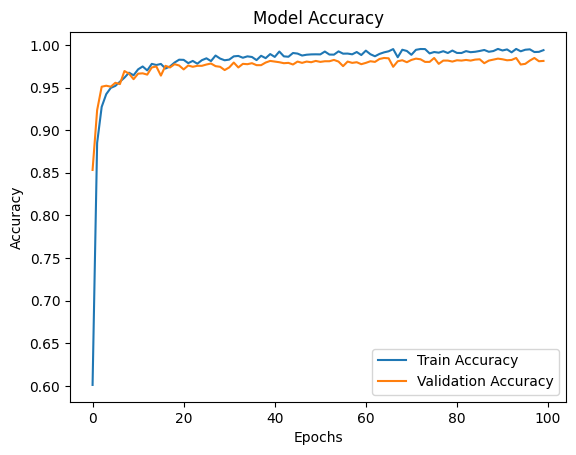

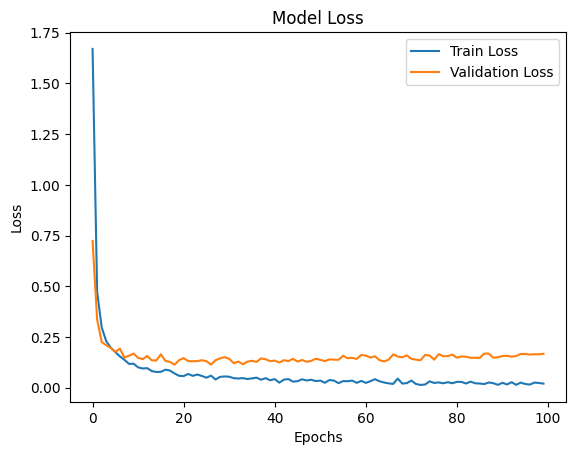

In [35]:
# Define the model
model = Sequential(
    [
        Input(shape=X_train.shape[1:]),
        # Rescaling(1.0 / X_train.max().max(), input_shape=X_train.shape[1:]),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dense(32, activation="relu"),
        Dense(total_class, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(
    # X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
)

# Visualisasi akurasi
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Visualisasi kerugian
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [36]:
import datetime

model_name = f"model-{datetime.datetime.now().strftime('%Y-%m-%d')}"
model_path = f"{model_name}.h5"
model.save(model_path)
print(model.summary())

# Memuat kembali model tanpa custom_objects
model_load = tf.keras.models.load_model(model_path)
# model_load = tf.keras.models.load_model(model_path, custom_objects={'CustomStandardScaler': CustomStandardScaler})
# # model_load = tf.keras.models.load_model(model_path, custom_objects={'CustomNormalization': CustomNormalization})
# print(model_load.summary())

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open(f"{model_name}.tflite", "wb") as f:
    f.write(tflite_model)

# Load the TFLite model and check for errors
interpreter = tf.lite.Interpreter(model_path=f"{model_name}.tflite")
interpreter.allocate_tensors()

print("Model loaded successfully with no errors.")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               16256     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 37)                1221      
                                                                 
Total params: 22117 (86.39 KB)
Trainable params: 21861 (85.39 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


c:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


None
INFO:tensorflow:Assets written to: C:\Users\ahmad\AppData\Local\Temp\tmpd4oifyy1\assets


INFO:tensorflow:Assets written to: C:\Users\ahmad\AppData\Local\Temp\tmpd4oifyy1\assets


Model loaded successfully with no errors.


In [37]:
interpreter = tf.lite.Interpreter(model_path='./model-2024-06-19.tflite')
interpreter.allocate_tensors()

# Contoh cara mengatur input dan output tensors (sesuaikan dengan model Anda)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:

# Misalkan X_test adalah sebuah dataframe atau array dengan banyak baris
y_pred_label = []

for i in range(len(X_test)):
    # Ambil satu sampel dari X_test
    input_data = np.array(X_test[i])
    input_data = np.expand_dims(input_data, axis=0)  # Tambahkan dimensi batch (1, ...) jika diperlukan

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data.astype(np.float32))

    # Melakukan inferensi
    interpreter.invoke()

    # Mendapatkan output dari tensor output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Mengambil label prediksi (misalnya dengan inverse transform jika diperlukan)
    sub_y_pred_label = label_encoder.inverse_transform(output_data.argmax(axis=1))

    y_pred_label.append(sub_y_pred_label[0])  # Simpan label prediksi

In [39]:
# y_pred = model.predict(X_test)
# y_pred = model_load.predict(X_test)
# y_pred_label = label_encoder.inverse_transform(y_pred.argmax(axis=1))
# print(y_pred_label)
print(y_pred_label[:5])

y_true_label = label_encoder.inverse_transform(y_test.argmax(axis=1))
print(y_true_label[:5])

['X', 'C', 'D', 'V', 'Sabar']
['X' 'C' 'D' 'V' 'Sabar']


In [40]:
test_feat_df = pd.read_csv("./datasets/extraction-feature-default/test-feature.csv")
test_label_df = pd.read_csv("./datasets/extraction-feature-default/test-label.csv")

display(test_feat_df.head(), test_label_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,2.221074,-0.875723,-0.087867,2.246008,-0.858548,0.908481,2.030196,-0.760385,0.765806,1.707969,-0.625899,0.697281,1.420529,-0.508393,0.577594,1.829379,-0.669061,-0.311143,1.406178,-0.563726,-0.264307,1.064990,-0.472442,-0.156780,0.827389,...,-0.691691,0.216916,-0.334136,-1.248365,0.698108,-0.079202,-0.838552,0.576678,-0.078964,-0.456207,0.395648,-0.107762,-0.205682,0.142169,-0.230739,-1.190978,0.493007,-0.029848,-0.771707,0.424354,-0.025707,-0.407985,0.303528,-0.047227,-0.159863
1,-0.041446,0.677951,0.486884,0.065838,0.890178,0.212383,0.210962,1.025525,0.283547,0.337784,1.124964,0.301298,0.459507,1.145410,0.300580,0.184555,0.743348,0.672914,0.201783,0.626017,0.659140,0.299700,0.652957,0.611784,0.382945,...,0.596721,0.119906,0.462566,0.748915,0.141113,0.198940,0.749591,0.254146,0.121082,0.583734,0.347831,0.166459,0.440405,0.081077,0.367665,0.686417,0.108065,0.183212,0.670993,0.188783,0.124101,0.530460,0.262324,0.155408,0.404780
2,2.537699,1.645681,-0.082847,2.461124,1.718571,0.014218,2.422080,1.767723,-0.266227,2.286476,1.728014,-0.435603,2.170034,1.642792,-0.561305,2.636856,1.580742,-0.211519,2.567320,1.498181,-0.374175,2.434305,1.342475,-0.441382,2.303873,...,0.150218,1.413023,0.731962,0.254501,1.948645,0.908192,0.095552,1.813615,0.940511,0.167818,1.635107,0.881103,0.245277,1.453768,0.728061,0.008329,1.815953,0.917181,0.102179,1.707509,0.981198,0.190060,1.560684,0.953791,0.240279
3,-0.079261,1.674868,2.801468,0.564313,1.502255,-4.190251,0.980596,1.099666,-3.959858,0.219402,0.851305,-3.757315,-0.652450,0.813264,-3.569188,0.317907,0.629139,-2.180292,0.593976,0.130398,-2.504731,0.707711,-0.185386,-2.576278,0.777768,...,-2.948365,-0.797908,0.598152,-1.781274,-1.094221,0.336148,-2.971153,-0.715834,0.622771,-3.493110,-0.421494,0.836725,-3.372000,-1.177452,0.799941,-1.652542,-1.339306,0.645909,-2.792486,-0.909603,0.899419,-2.945889,-0.520005,1.142644,-2.701514
4,-0.041743,-0.615559,0.087160,-0.117487,-0.669213,0.295127,-0.082372,-0.648563,0.439582,-0.011941,-0.624535,0.530737,0.019724,-0.635818,0.562279,0.294595,-0.408415,0.593918,0.465987,-0.277248,0.721687,0.574131,-0.214883,0.712696,0.643403,...,0.693615,0.393946,-0.362368,0.708211,0.573566,-0.375287,0.791008,0.683989,-0.441411,0.648464,0.765765,-0.457917,0.486542,0.392629,-0.345868,0.679377,0.531457,-0.331385,0.712248,0.617208,-0.370335,0.603316,0.683707,-0.387435,0.478128


,label
0,X
1,C
2,D
3,V
4,Sabar


In [41]:
eval_df = test_label_df
eval_df["label"] = label_encoder.inverse_transform(y_test.argmax(axis=1))
eval_df["predicted_kategorik"] = y_pred_label
print(eval_df.shape)

(2611, 2)


In [42]:
print(eval_df[eval_df["label"] != eval_df["predicted_kategorik"]].shape)
eval_df[eval_df["label"] != eval_df["predicted_kategorik"]].head(20)

(49, 2)


,label,predicted_kategorik
168,M,H
169,X,B
177,T,K
198,R,J
227,M,V
368,T,Y
385,O,M
410,M,N
496,M,W
644,Berapa,Z


In [43]:
# Menghitung jumlah True Positives (TP) dan False Negatives (FN) untuk setiap kelas
recall_data = eval_df.groupby("label").apply(
    lambda x: pd.Series(
        {
            "TP": sum(x["label"] == x["predicted_kategorik"]),
            "FN": sum(x["label"] != x["predicted_kategorik"]),
        }
    )
)

# Menghitung recall untuk setiap kelas
recall_data["Recall"] = recall_data["TP"] / (recall_data["TP"] + recall_data["FN"])
recall_data["Recall"] = recall_data["Recall"].fillna(
    0
)  # Mengganti NaN dengan 0 jika ada

recall_data_sorted = recall_data.sort_values(by="Recall")
# Menampilkan hasil
print("Recall for each class:")
print(recall_data_sorted)

Recall for each class:
          TP  FN    Recall
label                     
M         39   7  0.847826
W         55   4  0.932203
G         58   4  0.935484
Q         65   3  0.955882
T         45   2  0.957447
Apa       75   3  0.961538
O         54   2  0.964286
Berapa    57   2  0.966102
R         61   2  0.968254
F         99   3  0.970588
S        102   3  0.971429
X         82   2  0.976190
Kemana    85   2  0.977011
B         51   1  0.980769
D         55   1  0.982143
Y         63   1  0.984375
L         63   1  0.984375
U         66   1  0.985075
K         73   1  0.986486
E         75   1  0.986842
Kapan     78   1  0.987342
P         78   1  0.987342
N         97   1  0.989796
Tidur     83   0  1.000000
V         59   0  1.000000
Siapa     75   0  1.000000
Sabar     84   0  1.000000
A        103   0  1.000000
J         50   0  1.000000
I         71   0  1.000000
Halo      92   0  1.000000
H         61   0  1.000000
Dimana    89   0  1.000000
C         53   0  1.000000
Baik 